In [1]:
!pip install tensorflow-datasets 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

2024-07-16 14:41:14.597157: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-16 14:41:14.643943: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 14:41:14.643997: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 14:41:14.644028: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-16 14:41:14.651650: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-16 14:41:14.652224: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
(ds_train, ds_test), ds_info = tfds.load("mnist",
                                        split = ["train", "test"],
                                        shuffle_files=True,
                                        as_supervised=True,
                                        with_info=True)

In [4]:
def normalize(image, label):
    return tf.cast(image, tf.float32)/255., label

In [5]:
ds_train = ds_train.map(normalize, num_parallel_calls = tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

In [6]:
ds_test = ds_test.map(normalize, num_parallel_calls = tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache().shuffle(ds_info.splits['test'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

In [7]:
classes = [0,1,2,3,4,5,6,7,8,9]

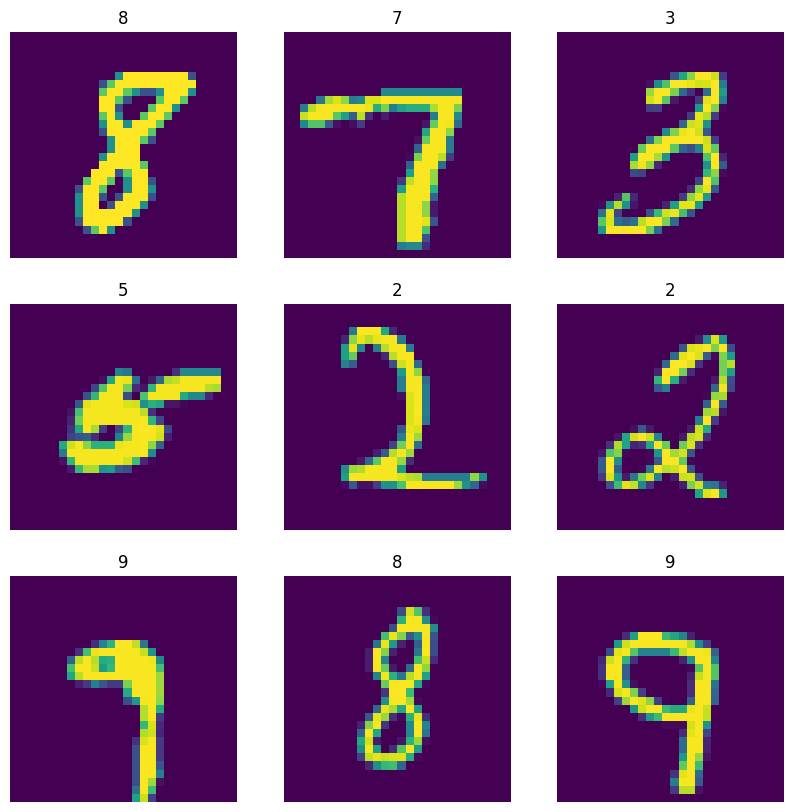

In [8]:
plt.figure(figsize=(10,10))
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # plt.imshow(np.squeeze(images[i]))
        plt.imshow(images[i])
        plt.title(classes[labels[i]])
        plt.axis('off')

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# !pip install pydot

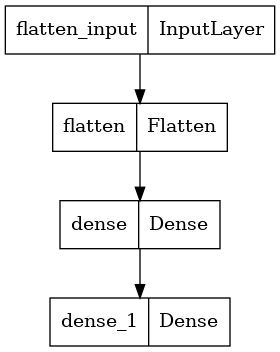

In [12]:
tf.keras.utils.plot_model(model)

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
history = model.fit(
    ds_train, 
    validation_data = ds_test,
    epochs=20
)

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.3528 - accuracy: 0.9037 - val_loss: 0.1818 - val_accuracy: 0.9476
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1576 - accuracy: 0.9556 - val_loss: 0.1288 - val_accuracy: 0.9630
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1135 - accuracy: 0.9668 - val_loss: 0.1076 - val_accuracy: 0.9687
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0882 - accuracy: 0.9747 - val_loss: 0.0915 - val_accuracy: 0.9720
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0706 - accuracy: 0.9796 - val_loss: 0.0817 - val_accuracy: 0.9750
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0583 - accuracy: 0.9829 - val_loss: 0.0767 - val_accuracy: 0.9775
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0491 - accuracy: 0.9858 - val_loss: 0.0753 - val_accuracy: 0.9774
Epoch 

In [15]:
for e in history.history:
    print(e)

loss
accuracy
val_loss
val_accuracy


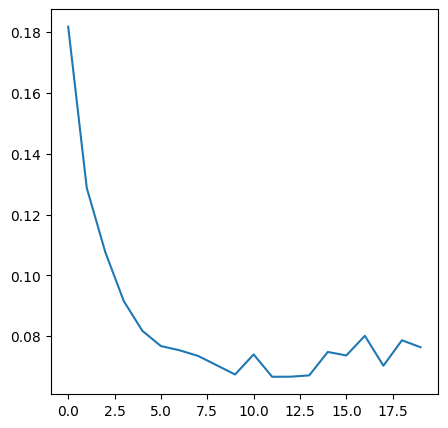

In [17]:
plt.figure(figsize=(5,5))
plt.plot(range(20), history.history['val_loss'])
plt.show()

In [18]:
model.evaluate(ds_test)

79/79 [==============================] - 0s 4ms/step - loss: 0.0763 - accuracy: 0.9796


[0.07634163647890091, 0.9796000123023987]

In [19]:
pred = model.predict(ds_test)
pred

79/79 [==============================] - 0s 3ms/step


array([[1.0042329e-09, 1.3302198e-09, 9.9999803e-01, ..., 2.4749355e-10,
        1.8760352e-06, 4.6062353e-14],
       [1.4931803e-17, 6.0541420e-12, 1.9028827e-18, ..., 4.8997823e-16,
        1.9058682e-11, 2.7396564e-13],
       [7.6312836e-07, 1.7771216e-09, 9.9974513e-01, ..., 9.7183975e-06,
        2.4429287e-04, 6.7462057e-11],
       ...,
       [1.2584321e-10, 8.2152200e-13, 3.7392349e-13, ..., 4.3142201e-10,
        2.4972410e-10, 1.6892311e-10],
       [1.0167536e-11, 5.5729203e-09, 3.9267668e-08, ..., 5.6334759e-12,
        9.9999970e-01, 2.0838963e-11],
       [9.9853972e-16, 1.1356702e-09, 5.3563570e-10, ..., 9.9999970e-01,
        5.4577599e-11, 1.0247965e-11]], dtype=float32)

In [20]:
pred = list(map(lambda x: np.argmax(x), pred))

In [21]:
pred

[2,
 3,
 2,
 4,
 8,
 0,
 0,
 9,
 0,
 9,
 3,
 9,
 7,
 1,
 7,
 3,
 2,
 7,
 2,
 2,
 2,
 0,
 7,
 2,
 6,
 1,
 9,
 2,
 0,
 2,
 4,
 1,
 1,
 1,
 1,
 7,
 4,
 2,
 4,
 0,
 8,
 6,
 9,
 0,
 5,
 4,
 2,
 0,
 7,
 2,
 1,
 9,
 8,
 8,
 7,
 8,
 7,
 1,
 9,
 4,
 8,
 5,
 1,
 2,
 6,
 4,
 7,
 1,
 0,
 7,
 9,
 8,
 3,
 8,
 8,
 8,
 3,
 1,
 7,
 9,
 9,
 7,
 1,
 2,
 3,
 7,
 8,
 0,
 1,
 1,
 3,
 0,
 0,
 0,
 0,
 4,
 6,
 4,
 4,
 5,
 9,
 3,
 7,
 6,
 7,
 4,
 0,
 6,
 1,
 8,
 2,
 9,
 2,
 7,
 1,
 7,
 1,
 5,
 1,
 5,
 9,
 8,
 3,
 4,
 8,
 6,
 3,
 0,
 7,
 2,
 0,
 9,
 1,
 7,
 2,
 0,
 6,
 1,
 3,
 8,
 3,
 2,
 4,
 6,
 1,
 3,
 3,
 7,
 2,
 8,
 2,
 4,
 6,
 1,
 8,
 1,
 0,
 2,
 0,
 6,
 9,
 7,
 4,
 7,
 2,
 6,
 1,
 1,
 8,
 6,
 2,
 8,
 3,
 2,
 1,
 9,
 6,
 0,
 6,
 2,
 0,
 6,
 7,
 8,
 9,
 1,
 0,
 4,
 1,
 4,
 7,
 4,
 9,
 4,
 4,
 1,
 1,
 3,
 7,
 0,
 1,
 7,
 1,
 0,
 3,
 4,
 4,
 5,
 7,
 5,
 6,
 5,
 3,
 6,
 7,
 0,
 3,
 1,
 0,
 5,
 3,
 8,
 8,
 8,
 1,
 9,
 8,
 9,
 0,
 5,
 3,
 8,
 7,
 3,
 6,
 7,
 4,
 8,
 1,
 4,
 0,
 0,
 5,
 4,
 6,
 8,
 1,
 7,
 0,
 7,


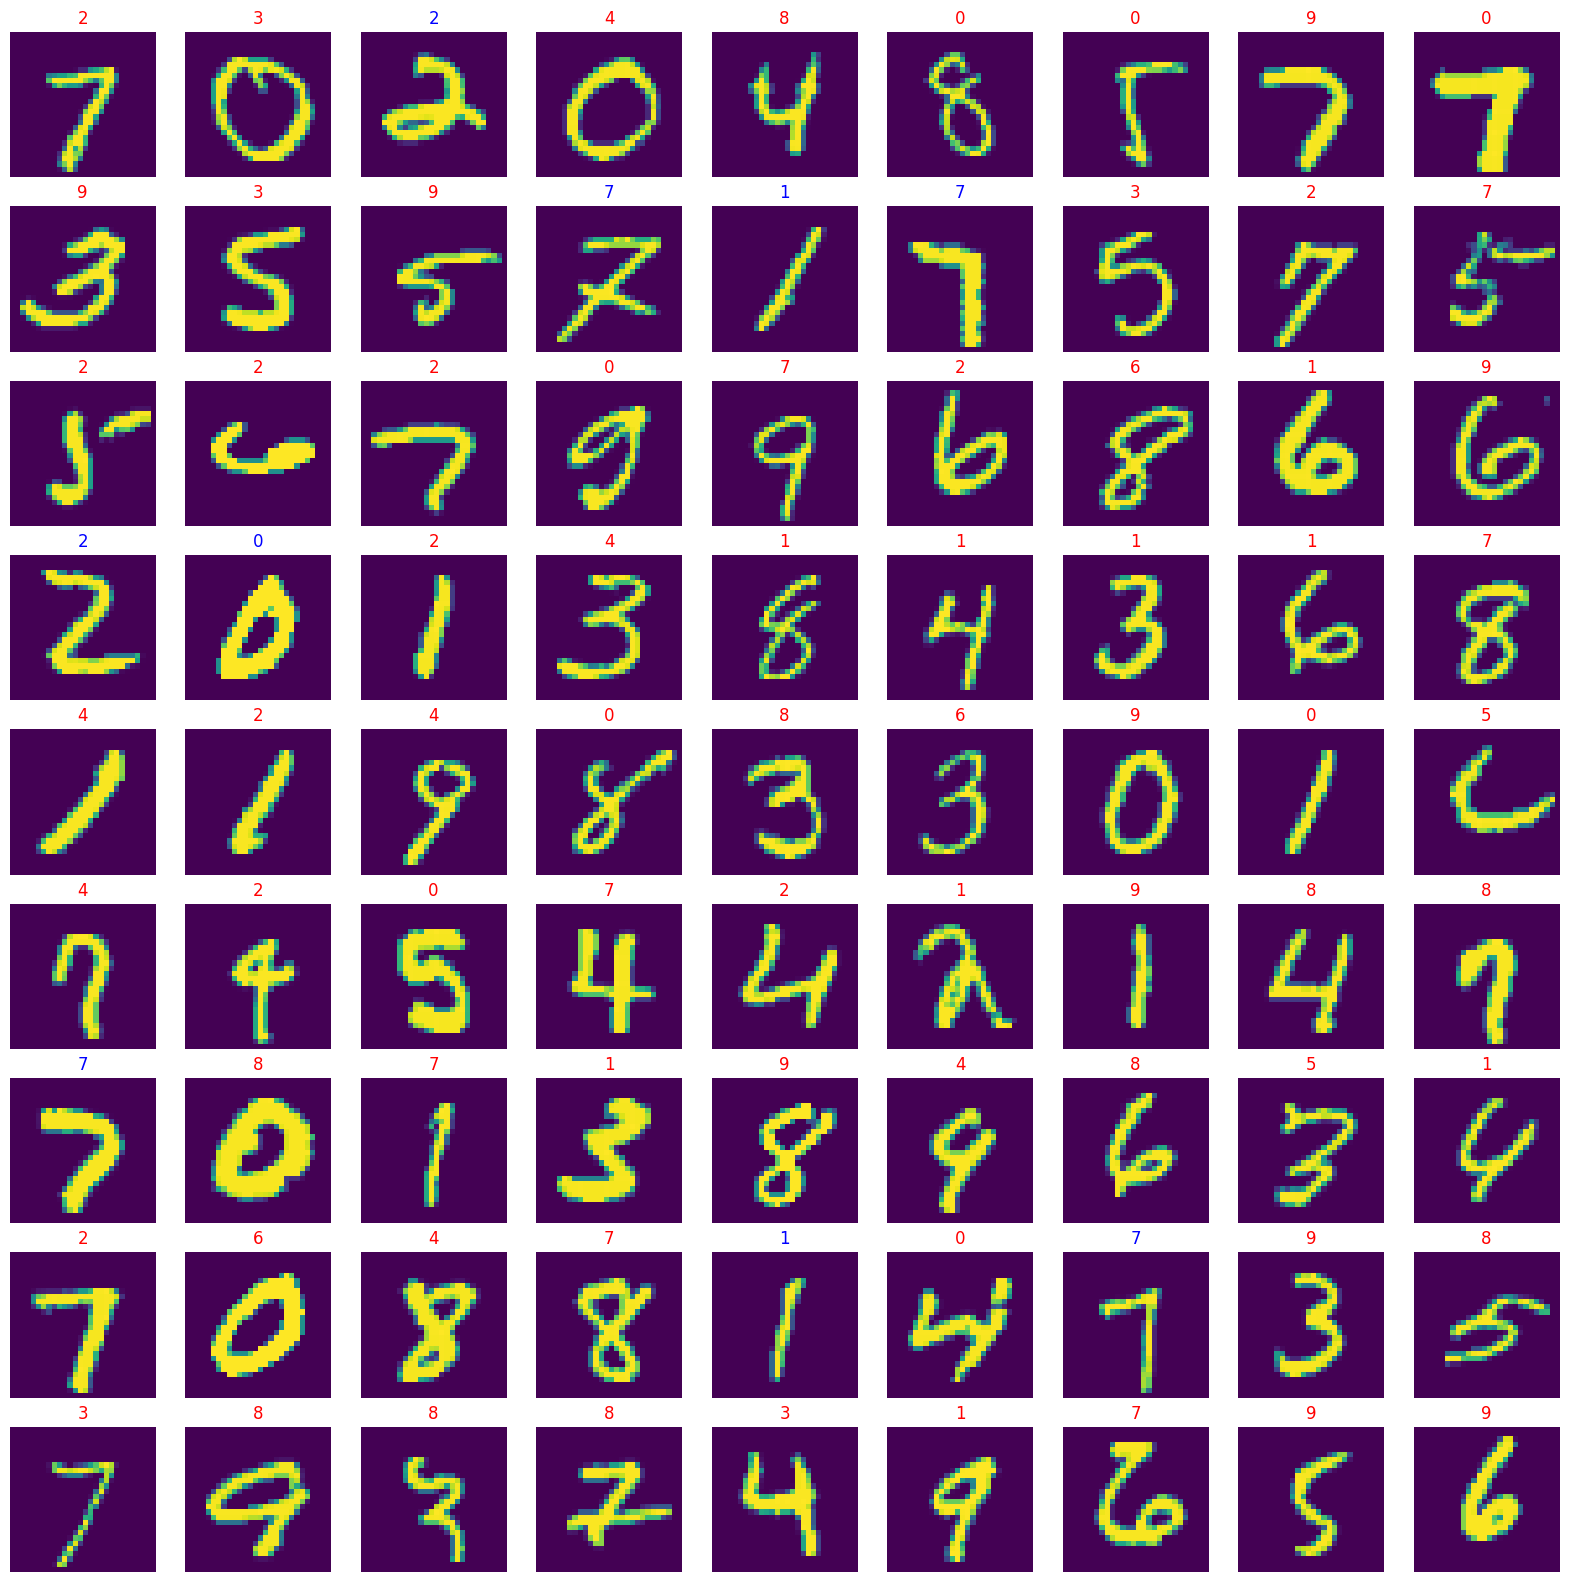

In [24]:
plt.figure(figsize=(20,20))

for images, labels in ds_test.take(1):
    for i in range(81):
        ax = plt.subplot(9, 9, i+1)
        plt.imshow(images[i])
        prediction = pred[i] == classes[labels[i]]
        plt.title(pred[i], color=('blue' if prediction else 'red'))
        plt.axis('off')